In [9]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import openpyxl
from scipy import stats

# File to Load
state_and_county_variables_values = Path("/Users/kelcigriffin/Project1/FoodEnvironmentAtlas2/StateAndCountyData.csv")
Population_Data = Path("/Users/kelcigriffin/Project1/FoodEnvironmentAtlas2/SupplementalDataCounty.csv")
environmental_atlas = Path("/Users/kelcigriffin/Project1/FoodEnvironmentAtlas2/FoodEnvironmentAtlas.xls")
# Read the modified state_and_county csv and store into Pandas DataFrame
Population_Data_df = pd.read_csv(Population_Data, encoding="utf-8")
state_and_county_df = pd.read_csv(state_and_county_variables_values, encoding="utf-8")
state_and_county_df.head()
health_data = "HEALTH"
environmental_atlas_df = pd.read_excel(environmental_atlas, "ACCESS")
environmental_atlas_df2 = pd.read_excel(environmental_atlas, "SOCIOECONOMIC")

# Assuming "State" and "County" are common identifiers
combined_df = pd.merge(environmental_atlas_df, environmental_atlas_df2, on=["State", "County"])

# Now, combined_df contains data from both sheets with a common "State" and "County"
# You can access the columns from both sheets as needed
georgia_county_filter = combined_df['State']== 'GA'

GAcounties = combined_df.loc[georgia_county_filter, ["State", "County", "PCT_LACCESS_WHITE15", "PCT_LACCESS_BLACK15", "PCT_LACCESS_HISP15", "POVRATE15"]]

GAcounties.reset_index()
# Example: Print the first few rows of the combined DataFrame
#print(combined_df.head())

,index,State,County,PCT_LACCESS_WHITE15,PCT_LACCESS_BLACK15,PCT_LACCESS_HISP15,POVRATE15
0,387,GA,Appling,16.821661,1.869959,1.636884,22.5
1,388,GA,Atkinson,12.734410,6.348366,4.487700,26.9
2,389,GA,Bacon,8.432688,2.847354,1.040776,23.9
3,390,GA,Baker,38.268083,34.252548,2.631843,28.7
4,391,GA,Baldwin,7.604044,8.358716,0.225290,26.0
...,...,...,...,...,...,...,...
154,541,GA,Whitfield,16.902456,0.802673,7.855625,15.3
155,542,GA,Wilcox,0.604696,0.171238,0.009412,30.4
156,543,GA,Wilkes,9.516189,8.222532,0.785384,22.9
157,544,GA,Wilkinson,12.365380,8.544017,0.606260,20.9


In [12]:
# Rename the columns
col = {
    "PCT_LACCESS_WHITE15": "(%) White",
    "PCT_LACCESS_BLACK15": "(%) Black",
    "PCT_LACCESS_HISP15": "(%) Hispanic",
    "POVRATE15": "2015 Poverty Rate"
}

GAcounties.rename(columns=col, inplace=True)
# Reset the index (assuming you want to drop the default index column)
GAcounties.reset_index(drop=True, inplace=True)

# Print the DataFrame with the new column names
GAcounties

,State,County,(%) White,(%) Black,(%) Hispanic,2015 Poverty Rate
0,GA,Appling,16.821661,1.869959,1.636884,22.5
1,GA,Atkinson,12.734410,6.348366,4.487700,26.9
2,GA,Bacon,8.432688,2.847354,1.040776,23.9
3,GA,Baker,38.268083,34.252548,2.631843,28.7
4,GA,Baldwin,7.604044,8.358716,0.225290,26.0
...,...,...,...,...,...,...
154,GA,Whitfield,16.902456,0.802673,7.855625,15.3
155,GA,Wilcox,0.604696,0.171238,0.009412,30.4
156,GA,Wilkes,9.516189,8.222532,0.785384,22.9
157,GA,Wilkinson,12.365380,8.544017,0.606260,20.9


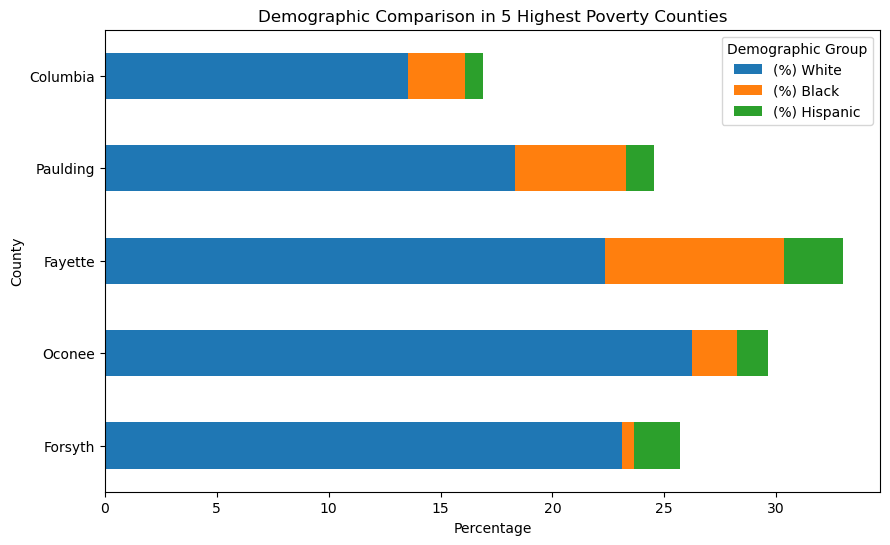

In [13]:
# Sort the DataFrame by the poverty rate in ascending order
GAcounties_sorted = GAcounties.sort_values(by='2015 Poverty Rate')

# Select the top 5 and bottom 5 counties
top5_counties = GAcounties_sorted.head(5)
bottom5_counties = GAcounties_sorted.tail(5)

# # Concatenate the top and bottom counties for comparison
# comparison_df = pd.concat([top5_counties, bottom5_counties])

# Plotting a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

top5_counties.set_index('County')[['(%) White', '(%) Black', '(%) Hispanic']].plot(kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Percentage')
ax.set_ylabel('County')
ax.set_title('Demographic Comparison in 5 Highest Poverty Counties')

# Customize legend
ax.legend(title='Demographic Group', loc='upper right')

plt.show()

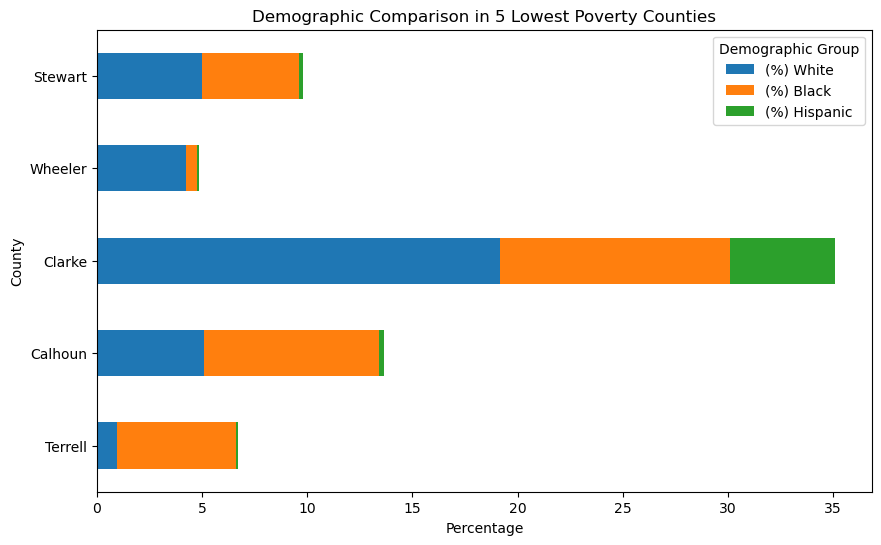

In [14]:
# Sort the DataFrame by the poverty rate in ascending order
GAcounties_sorted = GAcounties.sort_values(by='2015 Poverty Rate')

# Select the top 5 and bottom 5 counties
top5_counties = GAcounties_sorted.head(5)
bottom5_counties = GAcounties_sorted.tail(5)

# # Concatenate the top and bottom counties for comparison
# comparison_df = pd.concat([top5_counties, bottom5_counties])

# Plotting a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bottom5_counties.set_index('County')[['(%) White', '(%) Black', '(%) Hispanic']].plot(kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Percentage')
ax.set_ylabel('County')
ax.set_title('Demographic Comparison in 5 Lowest Poverty Counties')

# Customize legend
ax.legend(title='Demographic Group', loc='upper right')

plt.show()